In [1]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow.keras.layers import TextVectorization
from tensorflow.data import Dataset

output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]
sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length,
                                    max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)
print("Vocabulary: ", vectorize_layer.get_vocabulary())
print("Vectorized words: ", vectorized_words)

Vocabulary:  ['', '[UNK]', 'robot', 'you', 'too', 'i', 'am', 'a']
Vectorized words:  tf.Tensor(
[[5 6 7 2 0]
 [3 4 2 0 0]], shape=(2, 5), dtype=int64)


In [2]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.data import Dataset

output_length = 6
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]

sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length,
                                    max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)

word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)
print(embedded_words)

tf.Tensor(
[[[-9.43552703e-04  2.90143974e-02 -4.70151901e-02  2.59423144e-02
   -4.54345830e-02  3.94786038e-02]
  [ 4.25916649e-02  4.91746925e-02  2.46153139e-02  4.35330383e-02
   -3.78650799e-02  4.92941625e-02]
  [ 2.23028921e-02 -2.23571304e-02  4.17954363e-02  3.23335193e-02
    1.60940029e-02 -1.50224455e-02]
  [ 2.85725929e-02 -4.83919308e-03 -2.85779480e-02 -3.09673790e-02
   -1.97898746e-02  2.95898952e-02]
  [-2.41094232e-02  2.23749019e-02 -1.84762366e-02 -4.27691005e-02
   -2.50846278e-02 -2.07825191e-02]]

 [[-2.73226034e-02  1.13693364e-02 -3.03777214e-02 -2.81894803e-02
    4.33847420e-02  4.56795096e-05]
  [-2.91918274e-02  3.84262316e-02  3.62407602e-02 -2.53108144e-02
    1.22708566e-02 -6.15222380e-03]
  [ 2.85725929e-02 -4.83919308e-03 -2.85779480e-02 -3.09673790e-02
   -1.97898746e-02  2.95898952e-02]
  [-2.41094232e-02  2.23749019e-02 -1.84762366e-02 -4.27691005e-02
   -2.50846278e-02 -2.07825191e-02]
  [-2.41094232e-02  2.23749019e-02 -1.84762366e-02 -4.276910

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding

output_length = 6
output_sequence_length = 5

position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)
print(embedded_indices)

tf.Tensor(
[[-0.04893959 -0.03480425  0.03121817  0.04883592  0.04880663 -0.01248417]
 [-0.02210121 -0.01948665  0.04317489 -0.01486375 -0.03433386  0.04313609]
 [ 0.02445421  0.02206633 -0.0305702  -0.02969005  0.00707766 -0.01901942]
 [ 0.04563061 -0.03825051  0.03331323 -0.04430561 -0.04901592  0.01733624]
 [-0.04531658 -0.03366618  0.00304184 -0.04067056 -0.00984275  0.00299583]], shape=(5, 6), dtype=float32)


In [4]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow.keras.layers import TextVectorization, Embedding
from tensorflow.data import Dataset

output_length = 6
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]

sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length,
                                    max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)

word_embedding_layer = Embedding(vocab_size, output_length)
embedded_words = word_embedding_layer(vectorized_words)

position_embedding_layer = Embedding(output_sequence_length, output_length)
position_indices = tf.range(output_sequence_length)
embedded_indices = position_embedding_layer(position_indices)

final_output_embedding = embedded_words + embedded_indices
print("Final output: ", final_output_embedding)

Final output:  tf.Tensor(
[[[-0.02951973  0.03383018 -0.00159805 -0.06729053 -0.02464653
   -0.02261688]
  [ 0.00044615  0.00865455  0.01614052  0.00504422  0.05247961
   -0.02503349]
  [ 0.00302713  0.07380133 -0.00174202 -0.04929848 -0.01264509
   -0.02588826]
  [ 0.0417232   0.00989122 -0.04479476  0.02037159 -0.0573017
    0.04870648]
  [-0.01672972 -0.02071802  0.03104978 -0.00536473 -0.06280094
   -0.00223463]]

 [[-0.0091704  -0.02817455 -0.02552613 -0.05423345  0.02762948
   -0.09176591]
  [-0.07200956  0.03513291 -0.05646411  0.00991164 -0.01230254
    0.06105813]
  [-0.02543847  0.02287196 -0.02950374 -0.0005273  -0.02948708
   -0.01899048]
  [ 0.03262892  0.01421317  0.00165693 -0.02216333 -0.06333229
    0.07152601]
  [-0.01672972 -0.02071802  0.03104978 -0.00536473 -0.06280094
   -0.00223463]]], shape=(2, 5, 6), dtype=float32)


In [5]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

output_length = 6
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]

sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length,
                                    max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)

class PositionEmbeddingLayer(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim
        )

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

my_embedding_layer = PositionEmbeddingLayer(output_sequence_length,
                                            vocab_size, output_length)
embedded_layer_output = my_embedding_layer(vectorized_words)
print("Output from my_embedded_layer: ", embedded_layer_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-2.1301266e-02 -6.1996590e-02 -7.4814022e-02 -4.0219989e-02
    2.1626130e-02  7.2562434e-03]
  [-3.4292627e-02  6.0151290e-02 -6.1976291e-02  3.5985015e-02
   -7.6659545e-02  3.3798885e-02]
  [-3.4548137e-03 -5.2392293e-02  5.6154132e-03 -6.7253932e-03
   -1.6098442e-02 -4.8953749e-02]
  [ 2.4235286e-02  2.6777711e-02  2.9849090e-02  1.3070870e-02
    4.0417157e-02 -6.8302490e-02]
  [-6.7541711e-03  1.2169551e-02  4.8852153e-02  2.8988373e-02
    3.0033950e-02 -6.3547231e-02]]

 [[-4.7126353e-02 -1.1634845e-02  8.8143460e-03  4.2635597e-02
    3.7741832e-02 -2.4868453e-02]
  [-1.6423345e-02  4.3616328e-02 -2.2379637e-02  1.9140491e-02
   -3.5591424e-05  1.6029714e-02]
  [ 4.5728974e-02 -2.3462661e-02 -9.8804086e-03  8.6025968e-03
    1.6094588e-02 -6.4776838e-02]
  [-1.5147962e-02  4.1934475e-03  2.7367130e-02  5.1163003e-02
    3.9448772e-02 -5.6334972e-02]
  [-6.7541711e-03  1.2169551e-02  4.8852153e-02  2.8988373e-02
    3.0033950e-02 -

In [6]:
import tensorflow as tf
from tensorflow import convert_to_tensor, string
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
from tensorflow.data import Dataset
import numpy as np
import matplotlib.pyplot as plt

output_length = 6
output_sequence_length = 5
vocab_size = 10
sentences = [["I am a robot"], ["you too robot"]]

sentence_data = Dataset.from_tensor_slices(sentences)
# Create the TextVectorization layer
vectorize_layer = TextVectorization(output_sequence_length=output_sequence_length,
                                    max_tokens=vocab_size)
# Train the layer to create a dictionary
vectorize_layer.adapt(sentence_data)
# Convert all sentences to tensors
word_tensors = convert_to_tensor(sentences, dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_words = vectorize_layer(word_tensors)

class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)
        pos_embedding_matrix = self.get_position_encoding(seq_length, output_dim)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim,
            weights=[pos_embedding_matrix],
            trainable=False
        )

    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P


    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

attnisallyouneed_embedding = PositionEmbeddingFixedWeights(output_sequence_length,
                                            vocab_size, output_length)
attnisallyouneed_output = attnisallyouneed_embedding(vectorized_words)
print("Output from my_embedded_layer: ", attnisallyouneed_output)

Output from my_embedded_layer:  tf.Tensor(
[[[-0.9589243   1.2836622   0.23000172  1.9731903   0.01077196
    1.9999421 ]
  [ 0.56205547  1.5004725   0.3213085   1.9603932   0.01508068
    1.9999142 ]
  [ 1.566284    0.3377554   0.41192317  1.9433732   0.01938933
    1.999877  ]
  [ 1.0504174  -1.4061394   0.2314966   1.9860148   0.01077211
    1.9999698 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]

 [[ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [ 0.08466846 -0.11334133  0.23099795  1.9817369   0.01077207
    1.9999605 ]
  [ 1.8185948  -0.8322937   0.185397    1.9913884   0.00861771
    1.9999814 ]
  [ 0.14112     0.0100075   0.1387981   1.9903207   0.00646326
    1.9999791 ]
  [-0.7568025   0.3463564   0.18459873  1.982814    0.00861763
    1.9999628 ]]], shape=(2, 5, 6), dtype=float32)


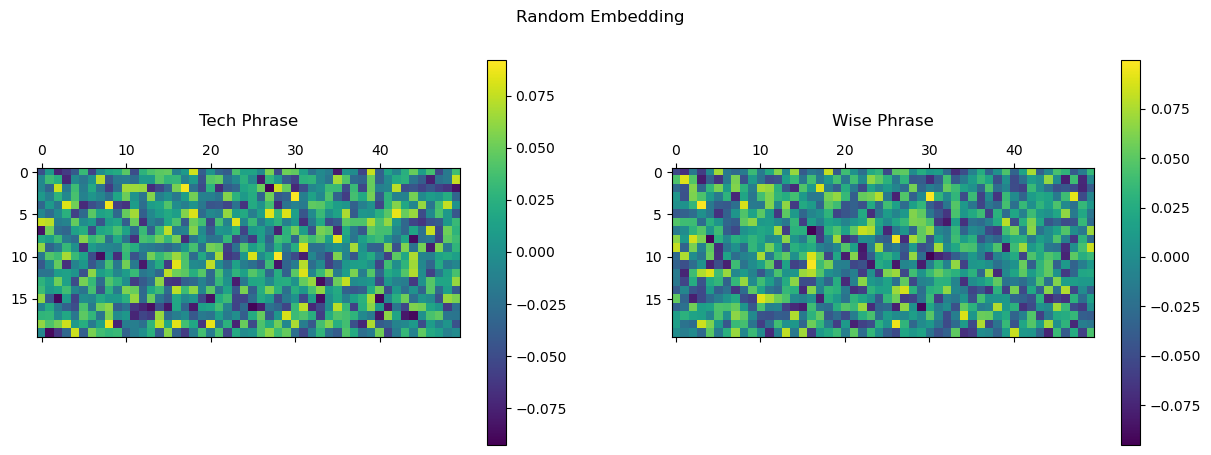

In [7]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
import numpy as np
import matplotlib.pyplot as plt

class PositionEmbeddingLayer(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim
        )

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)
        pos_embedding_matrix = self.get_position_encoding(seq_length, output_dim)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim,
            weights=[pos_embedding_matrix],
            trainable=False
        )

    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P


    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

technical_phrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"

total_vocabulary = 200
seq_length = 20
final_output_len = 50
phrase_vectorization_layer = TextVectorization(output_sequence_length=seq_length,
                                               max_tokens=total_vocabulary)
# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])
# Convert all sentences to tensors
phrase_tensors = convert_to_tensor([technical_phrase, wise_phrase],
                                   dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

random_weights_embedding_layer = PositionEmbeddingLayer(seq_length,
                                                        total_vocabulary,
                                                        final_output_len)
random_embedding = random_weights_embedding_layer(vectorized_phrases)

fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(random_embedding[i, :, :], (seq_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Random Embedding")
plt.show()

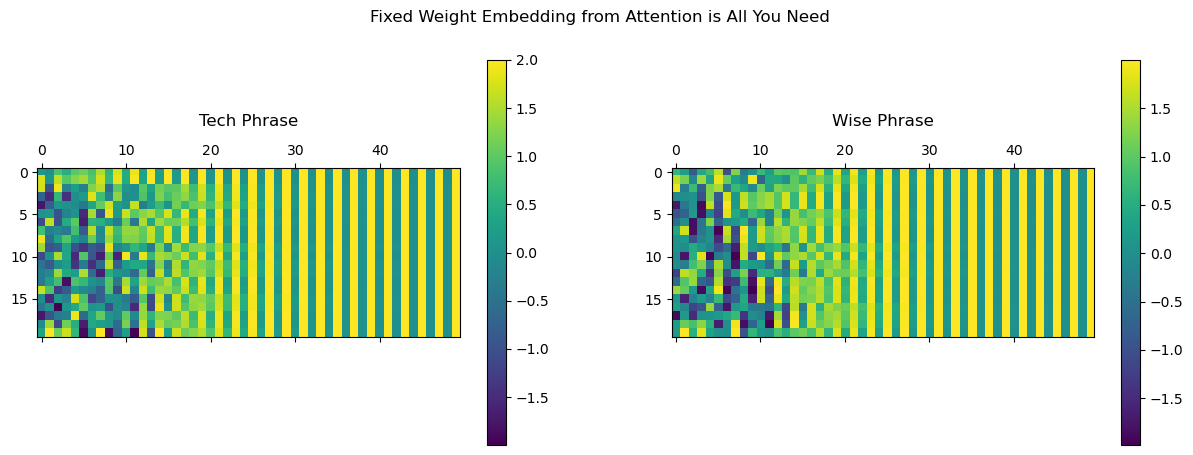

In [8]:
import tensorflow as tf
from tensorflow import convert_to_tensor
from tensorflow.keras.layers import TextVectorization, Embedding, Layer
import numpy as np
import matplotlib.pyplot as plt

class PositionEmbeddingLayer(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim
        )

    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

class PositionEmbeddingFixedWeights(Layer):
    def __init__(self, seq_length, vocab_size, output_dim, **kwargs):
        super().__init__(**kwargs)
        word_embedding_matrix = self.get_position_encoding(vocab_size, output_dim)
        pos_embedding_matrix = self.get_position_encoding(seq_length, output_dim)
        self.word_embedding_layer = Embedding(
            input_dim=vocab_size, output_dim=output_dim,
            weights=[word_embedding_matrix],
            trainable=False
        )
        self.position_embedding_layer = Embedding(
            input_dim=seq_length, output_dim=output_dim,
            weights=[pos_embedding_matrix],
            trainable=False
        )

    def get_position_encoding(self, seq_len, d, n=10000):
        P = np.zeros((seq_len, d))
        for k in range(seq_len):
            for i in np.arange(int(d/2)):
                denominator = np.power(n, 2*i/d)
                P[k, 2*i] = np.sin(k/denominator)
                P[k, 2*i+1] = np.cos(k/denominator)
        return P


    def call(self, inputs):
        position_indices = tf.range(tf.shape(inputs)[-1])
        embedded_words = self.word_embedding_layer(inputs)
        embedded_indices = self.position_embedding_layer(position_indices)
        return embedded_words + embedded_indices

technical_phrase = "to understand machine learning algorithms you need" +\
                   " to understand concepts such as gradient of a function "+\
                   "Hessians of a matrix and optimization etc"
wise_phrase = "patrick henry said give me liberty or give me death "+\
              "when he addressed the second virginia convention in march"

total_vocabulary = 200
seq_length = 20
final_output_len = 50
phrase_vectorization_layer = TextVectorization(output_sequence_length=seq_length,
                                               max_tokens=total_vocabulary)
# Learn the dictionary
phrase_vectorization_layer.adapt([technical_phrase, wise_phrase])
# Convert all sentences to tensors
phrase_tensors = convert_to_tensor([technical_phrase, wise_phrase],
                                   dtype=tf.string)
# Use the word tensors to get vectorized phrases
vectorized_phrases = phrase_vectorization_layer(phrase_tensors)

fixed_weights_embedding_layer = PositionEmbeddingFixedWeights(seq_length,
                                                        total_vocabulary,
                                                        final_output_len)
fixed_embedding = fixed_weights_embedding_layer(vectorized_phrases)

fig = plt.figure(figsize=(15, 5))
title = ["Tech Phrase", "Wise Phrase"]
for i in range(2):
    ax = plt.subplot(1, 2, 1+i)
    matrix = tf.reshape(fixed_embedding[i, :, :], (seq_length, final_output_len))
    cax = ax.matshow(matrix)
    plt.gcf().colorbar(cax)
    plt.title(title[i], y=1.2)
fig.suptitle("Fixed Weight Embedding from Attention is All You Need")
plt.show()